In [141]:
#Importing necesarry packages.

import pandas as pd
import numpy as np
import matplotlib 
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [25]:
#Loading and inspecting the dataset as 'btc_df'.

btc_df = pd.read_csv('../Data/BTC-USD.csv')
btc_df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-21,322.092010,328.158997,319.595001,326.927002,326.927002,28200500.0
1,2015-11-22,326.975006,327.010010,321.259003,324.536011,324.536011,23439400.0
2,2015-11-23,324.350006,325.118011,321.290009,323.045990,323.045990,27478900.0
3,2015-11-24,323.014008,323.058014,318.118011,320.045990,320.045990,29362600.0
4,2015-11-25,320.045013,329.134003,316.769989,328.205994,328.205994,41666900.0
5,2015-11-26,328.303009,366.756989,328.229004,352.683990,352.683990,106105000.0
6,2015-11-27,351.860992,363.588989,347.869995,358.041992,358.041992,55179100.0
7,2015-11-28,357.140991,359.536011,352.171997,357.381012,357.381012,36816600.0
8,2015-11-29,357.471985,371.938995,355.665985,371.294006,371.294006,40409300.0
9,2015-11-30,371.437012,382.363007,370.382996,377.321014,377.321014,71701600.0


In [26]:
#Changing the date column into the datetime type.

btc_df['Date'] = pd.to_datetime(btc_df['Date'], format='%Y-%m-%d')

In [27]:
#Setting the date column as the index to make visualization and working with the data
#more convenient.

btc_df.set_index('Date', inplace=True)
btc_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-21,322.092010,328.158997,319.595001,326.927002,326.927002,28200500.0
2015-11-22,326.975006,327.010010,321.259003,324.536011,324.536011,23439400.0
2015-11-23,324.350006,325.118011,321.290009,323.045990,323.045990,27478900.0
2015-11-24,323.014008,323.058014,318.118011,320.045990,320.045990,29362600.0
2015-11-25,320.045013,329.134003,316.769989,328.205994,328.205994,41666900.0
2015-11-26,328.303009,366.756989,328.229004,352.683990,352.683990,106105000.0
2015-11-27,351.860992,363.588989,347.869995,358.041992,358.041992,55179100.0
2015-11-28,357.140991,359.536011,352.171997,357.381012,357.381012,36816600.0
2015-11-29,357.471985,371.938995,355.665985,371.294006,371.294006,40409300.0


In [42]:
#Creating a five day simple moving average column.

btc_df['sma_5d'] = btc_df['Adj Close'].rolling(5, min_periods=5).mean()
btc_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,sma_5d,sma_10d,sma_30d,sma_90d,sma_180d,ema_1,ema_25,ema_5
Date,,,,,,,,,,,,,,
2015-11-21,322.092010,328.158997,319.595001,326.927002,326.927002,28200500.0,NaN,NaN,NaN,NaN,NaN,326.927002,326.927002,326.927002
2015-11-22,326.975006,327.010010,321.259003,324.536011,324.536011,23439400.0,NaN,NaN,NaN,NaN,NaN,326.687903,326.329254,325.731507
2015-11-23,324.350006,325.118011,321.290009,323.045990,323.045990,27478900.0,NaN,NaN,NaN,NaN,NaN,326.323712,325.508438,324.388748
2015-11-24,323.014008,323.058014,318.118011,320.045990,320.045990,29362600.0,NaN,NaN,NaN,NaN,NaN,325.695939,324.142826,322.217369
2015-11-25,320.045013,329.134003,316.769989,328.205994,328.205994,41666900.0,324.552197,NaN,NaN,NaN,NaN,325.946945,325.158618,325.211682
2015-11-26,328.303009,366.756989,328.229004,352.683990,352.683990,106105000.0,329.703595,NaN,NaN,NaN,NaN,328.620649,332.039961,338.947836
2015-11-27,351.860992,363.588989,347.869995,358.041992,358.041992,55179100.0,336.404791,NaN,NaN,NaN,NaN,331.562784,338.540469,348.494914
2015-11-28,357.140991,359.536011,352.171997,357.381012,357.381012,36816600.0,343.271796,NaN,NaN,NaN,NaN,334.144607,343.250605,352.937963
2015-11-29,357.471985,371.938995,355.665985,371.294006,371.294006,40409300.0,353.521399,NaN,NaN,NaN,NaN,337.859546,350.261455,362.115984


In [43]:
#Creating a ten day simple moving average column.

btc_df['sma_10d'] = btc_df['Adj Close'].rolling(10, min_periods=10).mean()
btc_df.head(10)

,Open,High,Low,Close,Adj Close,Volume,sma_5d,sma_10d,sma_30d,sma_90d,sma_180d,ema_1,ema_25,ema_5
Date,,,,,,,,,,,,,,
2015-11-21,322.092010,328.158997,319.595001,326.927002,326.927002,28200500.0,NaN,NaN,NaN,NaN,NaN,326.927002,326.927002,326.927002
2015-11-22,326.975006,327.010010,321.259003,324.536011,324.536011,23439400.0,NaN,NaN,NaN,NaN,NaN,326.687903,326.329254,325.731507
2015-11-23,324.350006,325.118011,321.290009,323.045990,323.045990,27478900.0,NaN,NaN,NaN,NaN,NaN,326.323712,325.508438,324.388748
2015-11-24,323.014008,323.058014,318.118011,320.045990,320.045990,29362600.0,NaN,NaN,NaN,NaN,NaN,325.695939,324.142826,322.217369
2015-11-25,320.045013,329.134003,316.769989,328.205994,328.205994,41666900.0,324.552197,NaN,NaN,NaN,NaN,325.946945,325.158618,325.211682
2015-11-26,328.303009,366.756989,328.229004,352.683990,352.683990,106105000.0,329.703595,NaN,NaN,NaN,NaN,328.620649,332.039961,338.947836
2015-11-27,351.860992,363.588989,347.869995,358.041992,358.041992,55179100.0,336.404791,NaN,NaN,NaN,NaN,331.562784,338.540469,348.494914
2015-11-28,357.140991,359.536011,352.171997,357.381012,357.381012,36816600.0,343.271796,NaN,NaN,NaN,NaN,334.144607,343.250605,352.937963
2015-11-29,357.471985,371.938995,355.665985,371.294006,371.294006,40409300.0,353.521399,NaN,NaN,NaN,NaN,337.859546,350.261455,362.115984


In [44]:
#Creating a thirty day simple moving average column.

btc_df['sma_30d'] = btc_df['Adj Close'].rolling(30, min_periods=30).mean()

In [45]:
#Creating a ninety day simple moving average column.

btc_df['sma_90d'] = btc_df['Adj Close'].rolling(90, min_periods=90).mean()

In [46]:
#Creating a 180 day simple moving average column.

btc_df['sma_180d'] = btc_df['Adj Close'].rolling(180, min_periods=180).mean()

In [47]:
#Creating an exponential moving average using a smoothing factor of 0.1.

btc_df['ema_1'] = btc_df['Adj Close'].ewm(alpha=0.1, adjust=False).mean()

In [48]:
#Creating an exponential moving average using a smoothing factor of 0.25.

btc_df['ema_25'] = btc_df['Adj Close'].ewm(alpha=0.25, adjust=False).mean()

In [49]:
#Creating an exponential moving average using a smoothing factor of 0.5.

btc_df['ema_5'] = btc_df['Adj Close'].ewm(alpha=0.5, adjust=False).mean()

In [94]:
#Making a function to compute the RSI

def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [95]:
#Creating the RSI column in the original dataframe using a fourteen day period.

btc_df['RSI'] = computeRSI(btc_df['Adj Close'], 14)

In [52]:
#inspecting the dataset to verify recent additions.

btc_df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,sma_5d,sma_10d,sma_30d,sma_90d,sma_180d,ema_1,ema_25,ema_5,stoch_rsi
Date,,,,,,,,,,,,,,,
2021-11-12,64863.980469,65460.816406,62333.914063,64155.941406,64155.941406,3.608489e+10,65727.957813,63904.221094,62336.199349,52752.633681,44827.076714,62911.668894,64495.662064,64688.291510,57.058404
2021-11-13,64158.121094,64915.675781,63303.734375,64469.527344,64469.527344,3.047423e+10,65108.497656,64054.169141,62574.466146,52946.217274,44943.365690,63067.454739,64489.128384,64578.909427,57.823658
2021-11-14,64455.371094,65495.179688,63647.808594,65466.839844,65466.839844,2.512209e+10,64807.500000,64455.630078,62703.562500,53162.465668,45068.684787,63307.393249,64733.556249,65022.874635,60.249849
2021-11-15,65521.289063,66281.570313,63548.144531,63557.871094,63557.871094,3.055876e+10,64520.028125,64698.849609,62792.418880,53372.049132,45216.214952,63332.441034,64439.634960,64290.372865,53.862838
2021-11-16,63721.195313,63721.195313,59016.335938,60161.246094,60161.246094,4.684434e+10,63562.285156,64562.226172,62746.006511,53542.716450,45323.873329,63015.321540,63370.037744,62225.809479,44.768907
2021-11-17,60139.621094,60823.609375,58515.410156,60368.011719,60368.011719,3.917839e+10,62804.699219,64266.328516,62690.737630,53694.387934,45452.002886,62750.590558,62619.531238,61296.910599,45.373525
2021-11-18,60360.136719,60948.500000,56550.792969,56942.136719,56942.136719,4.138834e+10,61299.221094,63203.859375,62446.742448,53778.865278,45559.811241,62169.745174,61200.182608,59119.523659,37.958904
2021-11-19,56896.128906,58351.113281,55705.179688,58119.578125,58119.578125,3.870241e+10,59829.768750,62318.634375,62184.300521,53881.244010,45689.527886,61764.728469,60430.031487,58619.550892,41.497364
2021-11-20,58115.082031,59859.878906,57469.726563,59697.195313,59697.195313,3.062426e+10,59057.633594,61788.830860,62100.534636,53996.527821,45806.145747,61557.975153,60246.822444,59158.373103,45.945838


In [123]:
def StochRSI(series, period=14, smoothK=3, smoothD=3):
    # Calculate RSI 
    delta = series.diff().dropna()
    ups = delta * 0
    downs = ups.copy()
    ups[delta > 0] = delta[delta > 0]
    downs[delta < 0] = -delta[delta < 0]
    ups[ups.index[period-1]] = np.mean( ups[:period] ) #first value is sum of avg gains
    ups = ups.drop(ups.index[:(period-1)])
    downs[downs.index[period-1]] = np.mean( downs[:period] ) #first value is sum of avg losses
    downs = downs.drop(downs.index[:(period-1)])
    rs = ups.ewm(com=period-1,min_periods=0,adjust=False,ignore_na=False).mean() / \
         downs.ewm(com=period-1,min_periods=0,adjust=False,ignore_na=False).mean() 
    rsi = 100 - 100 / (1 + rs)

    # Calculate StochRSI 
    stochrsi  = (rsi - rsi.rolling(period).min()) / (rsi.rolling(period).max() - rsi.rolling(period).min())
    stochrsi_K = stochrsi.rolling(smoothK).mean()
    stochrsi_D = stochrsi_K.rolling(smoothD).mean()

    return stochrsi, stochrsi_K, stochrsi_D

In [126]:
btc_df['StochRSI'] = StochRSI(btc_df['Adj Close'])[0]
btc_df['StochRSIk'] = StochRSI(btc_df['Adj Close'])[1]
btc_df['StochRSId'] = StochRSI(btc_df['Adj Close'])[2]

In [53]:
#Inspecting the type and number of values in the dataset. All of the types were floats and
#there are 2189 values in the dataset. The null values arise from the computation of each 
#of the values, for example, the 90 day simple moving average requires 90 periods prior
#to calculating, therefore, there will not be a value for that column in the first 
#89 days.

btc_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2193 entries, 2015-11-21 to 2021-11-21
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2189 non-null   float64
 1   High       2189 non-null   float64
 2   Low        2189 non-null   float64
 3   Close      2189 non-null   float64
 4   Adj Close  2189 non-null   float64
 5   Volume     2189 non-null   float64
 6   sma_5d     2175 non-null   float64
 7   sma_10d    2160 non-null   float64
 8   sma_30d    2100 non-null   float64
 9   sma_90d    1920 non-null   float64
 10  sma_180d   1655 non-null   float64
 11  ema_1      2193 non-null   float64
 12  ema_25     2193 non-null   float64
 13  ema_5      2193 non-null   float64
 14  stoch_rsi  2172 non-null   float64
dtypes: float64(15)
memory usage: 274.1 KB


In [79]:
#why does it work when i do not include [n] but will not otherwise?

def calc_trix(data):
    trix = []
    for n in range(0, 2188):
        #ema1 = btc_df['ema_1'][n-1]+((2 / (n + 1)) * (btc_df['Adj Close'] - btc_df['ema_1'][n-1]))
        #ema2 = btc_df['ema_1'][n-1]+((2 / (n + 1)) * (btc_df['Adj Close'] - btc_df['ema_1'][n-1]))
        ema1 = btc_df['Adj Close'].ewm(alpha=0.1, adjust=False)[n].mean()
        ema2 = ema1.ewm(alpha=0.1, adjust=False)[n].mean()
        ema3 = ema2.ewm(alpha=0.1, adjust=False)[n].mean()
        trixx = ((ema3[n]-ema3[n-1])/ema3[n-1])
        trix.append(trixx)
        return trix


In [80]:
calc_trix(btc_df)

AttributeError: 'Series' object has no attribute 'columns'

In [64]:
#Creating a column with the values for the volume weighted moving average.

btc_df['vwap'] = (np.cumsum(btc_df.Volume * btc_df['Adj Close']) / np.cumsum(btc_df.Volume))

In [81]:
#Creating a function that will calculate the average directional movement index.

def ADX(data: pd.DataFrame, period: int):
    """
    Computes the ADX indicator.
    """
    
    df = data.copy()
    alpha = 1/period

    # TR
    df['H-L'] = df['High'] - df['Low']
    df['H-C'] = np.abs(df['High'] - df['Close'].shift(1))
    df['L-C'] = np.abs(df['Low'] - df['Close'].shift(1))
    df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)
    del df['H-L'], df['H-C'], df['L-C']

    # ATR
    df['ATR'] = df['TR'].ewm(alpha=alpha, adjust=False).mean()

    # +-DX
    df['H-pH'] = df['High'] - df['High'].shift(1)
    df['pL-L'] = df['Low'].shift(1) - df['Low']
    df['+DX'] = np.where(
        (df['H-pH'] > df['pL-L']) & (df['H-pH']>0),
        df['H-pH'],
        0.0
    )
    df['-DX'] = np.where(
        (df['H-pH'] < df['pL-L']) & (df['pL-L']>0),
        df['pL-L'],
        0.0
    )
    del df['H-pH'], df['pL-L']

    # +- DMI
    df['S+DM'] = df['+DX'].ewm(alpha=alpha, adjust=False).mean()
    df['S-DM'] = df['-DX'].ewm(alpha=alpha, adjust=False).mean()
    df['+DMI'] = (df['S+DM']/df['ATR'])*100
    df['-DMI'] = (df['S-DM']/df['ATR'])*100
    del df['S+DM'], df['S-DM']

    # ADX
    df['DX'] = (np.abs(df['+DMI'] - df['-DMI'])/(df['+DMI'] + df['-DMI']))*100
    df['ADX'] = df['DX'].ewm(alpha=alpha, adjust=False).mean()
    del df['DX'], df['ATR'], df['TR'], df['-DX'], df['+DX'], df['+DMI'], df['-DMI']

    return df

In [98]:
#Saving the values from using the ADX function into the original dataframe.

btc_df['ADX'] = ADX(btc_df, 15)['ADX']

In [90]:
#Calculating the upper or 'positive' bollinger line using the 30 day simple moving average.

btc_df['boll_p'] = btc_df['sma_30d'] + 2*(btc_df['sma_30d'].std())

In [91]:
#Calculating the lower or 'negative' bollinger line using the same 30 day 
#simple moving average.

btc_df['boll_n'] = btc_df['sma_30d'] - 2*(btc_df['sma_30d'].std())

In [92]:
#Creating a coefficient to represent the relationship between the upper and lower bollinger
#lines. A higher number will represent a larger spread between bollinger lines.

btc_df['boll'] = btc_df['boll_p']/btc_df['boll_n']

In [99]:
#Checking to make sure that the new columns make sense.

btc_df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,sma_5d,sma_10d,sma_30d,sma_90d,...,ema_1,ema_25,ema_5,stoch_rsi,vwap,boll_p,boll_n,boll,RSI,ADX
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-12,64863.980469,65460.816406,62333.914063,64155.941406,64155.941406,3.608489e+10,65727.957813,63904.221094,62336.199349,52752.633681,...,62911.668894,64495.662064,64688.291510,57.058404,25875.326574,93049.799761,31622.598937,2.942510,57.058404,31.176362
2021-11-13,64158.121094,64915.675781,63303.734375,64469.527344,64469.527344,3.047423e+10,65108.497656,64054.169141,62574.466146,52946.217274,...,63067.454739,64489.128384,64578.909427,57.823658,25907.586146,93288.066558,31860.865734,2.927983,57.823658,29.898423
2021-11-14,64455.371094,65495.179688,63647.808594,65466.839844,65466.839844,2.512209e+10,64807.500000,64455.630078,62703.562500,53162.465668,...,63307.393249,64733.556249,65022.874635,60.249849,25934.826239,93417.162913,31989.962088,2.920202,60.249849,28.907003
2021-11-15,65521.289063,66281.570313,63548.144531,63557.871094,63557.871094,3.055876e+10,64520.028125,64698.849609,62792.418880,53372.049132,...,63332.441034,64439.634960,64290.372865,53.862838,25966.313203,93506.019293,32078.818468,2.914884,53.862838,28.250911
2021-11-16,63721.195313,63721.195313,59016.335938,60161.246094,60161.246094,4.684434e+10,63562.285156,64562.226172,62746.006511,53542.716450,...,63015.321540,63370.037744,62225.809479,44.768907,26010.126214,93459.606923,32032.406098,2.917658,44.768907,26.897336
2021-11-17,60139.621094,60823.609375,58515.410156,60368.011719,60368.011719,3.917839e+10,62804.699219,64266.328516,62690.737630,53694.387934,...,62750.590558,62619.531238,61296.910599,45.373525,26046.904558,93404.338043,31977.137218,2.920972,45.373525,25.794575
2021-11-18,60360.136719,60948.500000,56550.792969,56942.136719,56942.136719,4.138834e+10,61299.221094,63203.859375,62446.742448,53778.865278,...,62169.745174,61200.182608,59119.523659,37.958904,26081.802333,93160.342860,31733.142036,2.935743,37.958904,25.357342
2021-11-19,56896.128906,58351.113281,55705.179688,58119.578125,58119.578125,3.870241e+10,59829.768750,62318.634375,62184.300521,53881.244010,...,61764.728469,60430.031487,58619.550892,41.497364,26115.606493,92897.900933,31470.700109,2.951885,41.497364,25.184481
2021-11-20,58115.082031,59859.878906,57469.726563,59697.195313,59697.195313,3.062426e+10,59057.633594,61788.830860,62100.534636,53996.527821,...,61557.975153,60246.822444,59158.373103,45.945838,26143.620439,92814.135048,31386.934223,2.957095,45.945838,24.392311


In [138]:
btc_search = pd.read_csv('../Data/multiTimeline.csv', header=1, parse_dates=True)

In [139]:
btc_search

,Month,bitcoin: (United States)
0,2015-12,3
1,2016-01,3
2,2016-02,2
3,2016-03,2
4,2016-04,2
...,...,...
67,2021-07,21
68,2021-08,21
69,2021-09,20
70,2021-10,27


In [140]:
btc_search['Month']

0     2015-12
1     2016-01
2     2016-02
3     2016-03
4     2016-04
       ...   
67    2021-07
68    2021-08
69    2021-09
70    2021-10
71    2021-11
Name: Month, Length: 72, dtype: object

In [111]:
#Why isnt the format right?
pd.to_datetime(btc_search.index)

ValueError: time data Month doesn't match format specified

In [112]:
btc_geoS = pd.read_csv('../Data/geoMap.csv')
btc_geoS

,Category: All categories
DMA,bitcoin: (11/21/15 - 11/21/21)
San Francisco-Oakland-San Jose CA,100
Las Vegas NV,89
West Palm Beach-Ft. Pierce FL,87
Seattle-Tacoma WA,86
...,...
Harlingen-Weslaco-Brownsville-McAllen TX,29
Zanesville OH,28
Hattiesburg-Laurel MS,27
Laredo TX,26


In [116]:
#Creating the 21 rolling day average for volume to be used to calculate the chaikin
#money flow indicator.
btc_df['21rollingV'] = btc_df['Volume'].rolling(21, min_periods=21).mean()

In [119]:
#Creating the Money flow multiplier to use to calculate money flow volume.
#((Close value – Low value) – (High value – Close value)) / (High value – Low value)

btc_df['MFM'] = ((btc_df['Close']-btc_df['Low'])-(btc_df['High']-btc_df['Close']))/(btc_df['High']-btc_df['Low'])

In [120]:
#Creating the money flow volume column to be used to calculate the chaikin money flow
#indicator
#Money Flow Volume = Money Flow Multiplier x Volume for the Period

btc_df['MFV'] = btc_df['MFM']*btc_df['Volume']

In [121]:
#Creating the Chaikin Money Flow indicator column.

btc_df['CMF'] = (btc_df['MFV'].rolling(21, min_periods=21).mean())/btc_df['21rollingV']

In [127]:
btc_df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,sma_5d,sma_10d,sma_30d,sma_90d,...,boll,RSI,ADX,21rollingV,MFM,MFV,CMF,StochRSI,StochRSIk,StochRSId
Date,,,,,,,,,,,,,,,,,,,,,
2021-11-12,64863.980469,65460.816406,62333.914063,64155.941406,64155.941406,3.608489e+10,65727.957813,63904.221094,62336.199349,52752.633681,...,2.942510,57.058404,31.176362,3.531225e+10,0.165388,5.968011e+09,0.115519,0.186197,0.314645,0.536576
2021-11-13,64158.121094,64915.675781,63303.734375,64469.527344,64469.527344,3.047423e+10,65108.497656,64054.169141,62574.466146,52946.217274,...,2.927983,57.823658,29.898423,3.548329e+10,0.446446,1.360509e+10,0.110324,0.242622,0.267498,0.375099
2021-11-14,64455.371094,65495.179688,63647.808594,65466.839844,65466.839844,2.512209e+10,64807.500000,64455.630078,62703.562500,53162.465668,...,2.920202,60.249849,28.907003,3.537881e+10,0.969319,2.435131e+10,0.129361,0.421514,0.283445,0.288529
2021-11-15,65521.289063,66281.570313,63548.144531,63557.871094,63557.871094,3.055876e+10,64520.028125,64698.849609,62792.418880,53372.049132,...,2.914884,53.862838,28.250911,3.535470e+10,-0.992883,-3.034128e+10,0.065736,0.000000,0.221379,0.257440
2021-11-16,63721.195313,63721.195313,59016.335938,60161.246094,60161.246094,4.684434e+10,63562.285156,64562.226172,62746.006511,53542.716450,...,2.917658,44.768907,26.897336,3.592448e+10,-0.513307,-2.404554e+10,0.068412,0.000000,0.140505,0.215109
2021-11-17,60139.621094,60823.609375,58515.410156,60368.011719,60368.011719,3.917839e+10,62804.699219,64266.328516,62690.737630,53694.387934,...,2.920972,45.373525,25.794575,3.571121e+10,0.605235,2.371215e+10,0.148761,0.025920,0.008640,0.123508
2021-11-18,60360.136719,60948.500000,56550.792969,56942.136719,56942.136719,4.138834e+10,61299.221094,63203.859375,62446.742448,53778.865278,...,2.935743,37.958904,25.357342,3.552699e+10,-0.822024,-3.402220e+10,0.089874,0.000000,0.008640,0.052595
2021-11-19,56896.128906,58351.113281,55705.179688,58119.578125,58119.578125,3.870241e+10,59829.768750,62318.634375,62184.300521,53881.244010,...,2.951885,41.497364,25.184481,3.561487e+10,0.824988,3.192902e+10,0.109610,0.117414,0.047778,0.021686
2021-11-20,58115.082031,59859.878906,57469.726563,59697.195313,59697.195313,3.062426e+10,59057.633594,61788.830860,62100.534636,53996.527821,...,2.957095,45.945838,24.392311,3.554184e+10,0.863872,2.645544e+10,0.129131,0.265025,0.127480,0.061299


In [ ]:
import backtrader as bt
from datetime import datetime

class KlingerOsc(bt.Indicator):

    lines = ('sig','kvo')

    params = (('kvoFast',34),('kvoSlow',55),('sigPeriod',13))

    def __init__(self):
        self.plotinfo.plotyhlines = [0]
        self.addminperiod(55)

        self.data.hlc3 = (self.data.high + self.data.low + self.data.close) / 3
        # This works - Note indexing should be () rather than []
        # See: https://www.backtrader.com/docu/concepts.html#lines-delayed-indexing
        self.data.sv = bt.If((self.data.hlc3(0) - self.data.hlc3(-1)) / self.data.hlc3(-1) >=0, self.data.volume, -self.data.volume)
        self.lines.kvo = bt.indicators.EMA(self.data.sv, period=self.p.kvoFast) - bt.indicators.EMA(self.data.sv, period=self.p.kvoSlow)
        self.lines.sig = bt.indicators.EMA(self.lines.kvo, period=self.p.sigPeriod)


class testStrategy(bt.Strategy):

    def __init__(self):
        self.KOsc = KlingerOsc(self.data)


#Create an instance of cerebro
cerebro = bt.Cerebro()

#Add our strategy
cerebro.addstrategy(testStrategy)

#Get Apple data from Yahoo Finance.
data = bt.feeds.Quandl(
    dataname='AAPL',
    fromdate = datetime(2016,1,1),
    todate = datetime(2017,1,1),
    buffered= True,
    apikey="NBQhvwRzCgdB-6e7XNAD"
    )

#Add the data to Cerebro
cerebro.adddata(data)

# Run over everything
cerebro.run()

#Finally plot the end results
cerebro.plot(style='candlestick')

In [128]:
from statsmodels.tsa.arima.model import ARIMA

In [131]:
#Need to look into using arima models


arima = ARIMA(btc_df['Close'])
arima_btc = arima.fit(btc_df)
# summary of fit model
print(arima_btc.summary())
# line plot of residuals
residuals = DataFrame(arima_btc.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

/Users/Teigen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


ValueError: length of x0 != length of bounds

In [142]:
Adj_close_series = pd.Series(data=btc_df['Adj Close'], index=btc_df.index)

In [143]:
Adj_close_series

Date
2015-11-21      326.927002
2015-11-22      324.536011
2015-11-23      323.045990
2015-11-24      320.045990
2015-11-25      328.205994
                  ...     
2021-11-17    60368.011719
2021-11-18    56942.136719
2021-11-19    58119.578125
2021-11-20    59697.195313
2021-11-21    59558.062500
Name: Adj Close, Length: 2193, dtype: float64

/Users/Teigen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


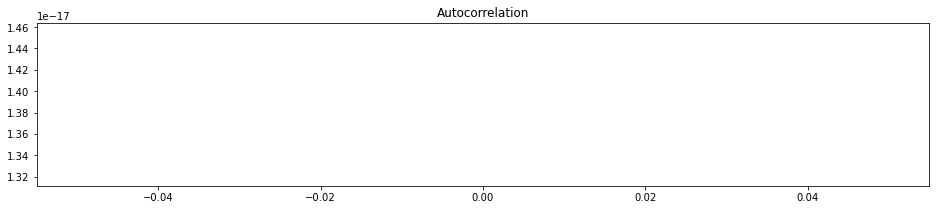

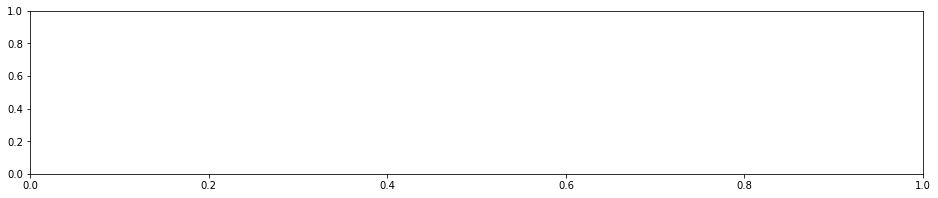

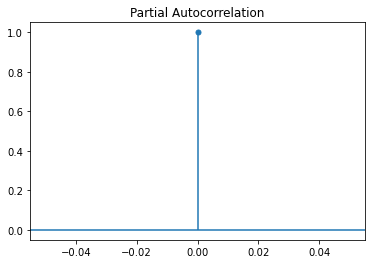

In [160]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(16,3))
plot_acf(btc_df['Adj Close'], ax=ax, lags=400)
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(btc_df['Adj Close'], lags=40);

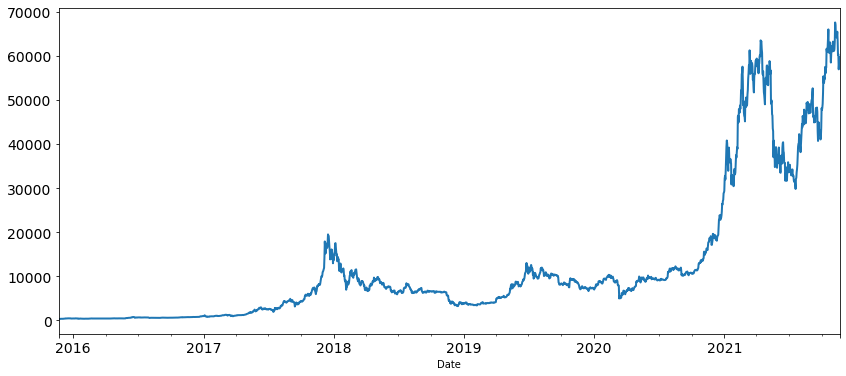

In [161]:
Adj_close_series.plot(figsize=(14,6), linewidth=2, fontsize=14);

In [163]:
recent_series = Adj_close_series['2021-09-01':]

In [164]:
recent_series

Date
2021-09-01    48847.027344
2021-09-02    49327.722656
2021-09-03    50025.375000
2021-09-04    49944.625000
2021-09-05    51753.410156
                  ...     
2021-11-17    60368.011719
2021-11-18    56942.136719
2021-11-19    58119.578125
2021-11-20    59697.195313
2021-11-21    59558.062500
Name: Adj Close, Length: 82, dtype: float64

/Users/Teigen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


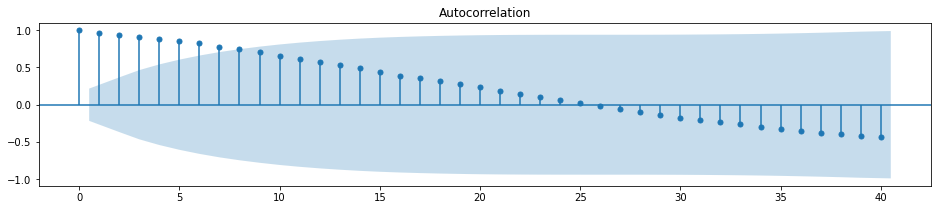

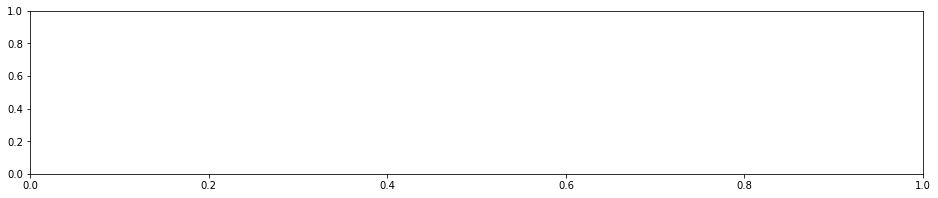

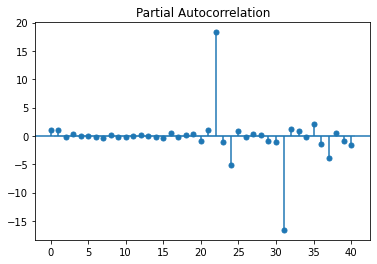

In [166]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(recent_series, ax=ax, lags=40)
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(recent_series, lags=40);

In [167]:
from sklearn.preprocessing import StandardScaler

In [174]:
X = btc_df.index
y = btc_df['Adj Close']

In [175]:
scaler = StandardScaler()
scaled_AC = scaler.fit_transform(X, y)

ValueError: Expected 2D array, got 1D array instead:
array=[1.4480640e+18 1.4481504e+18 1.4482368e+18 ... 1.6372800e+18 1.6373664e+18
 1.6374528e+18].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

ValueError: PandasArray must be 1-dimensional.

In [171]:
scaled_series

array([[-0.74773752, -0.74748798, -0.74858355, ...,         nan,
                nan,         nan],
       [-0.74742645, -0.74755915, -0.74847407, ...,         nan,
                nan,         nan],
       [-0.74759368, -0.74767635, -0.74847203, ...,         nan,
                nan,         nan],
       ...,
       [ 2.85627179,  2.84659526,  2.89517362, ..., -1.09480728,
        -1.40619734, -1.54473423],
       [ 2.93392434,  2.94005188,  3.01126124, ..., -0.68504718,
        -1.1648231 , -1.42005166],
       [ 3.03420436,  2.94239311,  3.08836198, ..., -0.71539223,
        -0.90831829, -1.20650709]])

In [177]:
AC_df = pd.DataFrame(btc_df['Adj Close'])

In [178]:
AC_df

,Adj Close
Date,
2015-11-21,326.927002
2015-11-22,324.536011
2015-11-23,323.045990
2015-11-24,320.045990
2015-11-25,328.205994
...,...
2021-11-17,60368.011719
2021-11-18,56942.136719
2021-11-19,58119.578125


In [179]:
AC_scaled = scaler.fit_transform(AC_df)

In [180]:
AC_scaled

array([[-0.74766229],
       [-0.74781432],
       [-0.74790906],
       ...,
       [ 2.92692621],
       [ 3.02723471],
       [ 3.01838832]])

/Users/Teigen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/numpy/core/_asarray.py:85: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


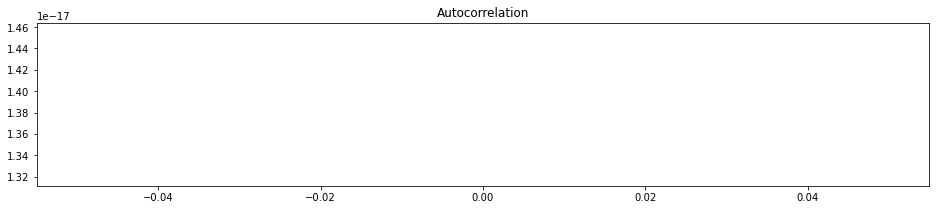

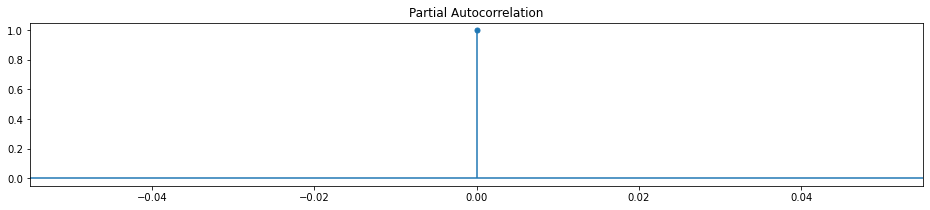

In [184]:
fig, ax = plt.subplots(figsize=(16,3))
plot_acf(AC_scaled, ax=ax, lags=40)
fig, ax = plt.subplots(figsize=(16,3))
plot_pacf(AC_scaled, ax=ax, lags=40);

In [185]:
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
arma = ARMA(AC_scaled, order=(1,0))

/Users/Teigen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


# Time series modeling

In [187]:
!pip install pmdarima

     |████████████████████████████████| 595 kB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 33.5 MB/s eta 0:00:01
     |████████████████████████████████| 16.9 MB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 26.3 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
      Successfully uninstalled numpy-1.18.5
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the 

In [189]:
recent_series.index.freq = 'D'

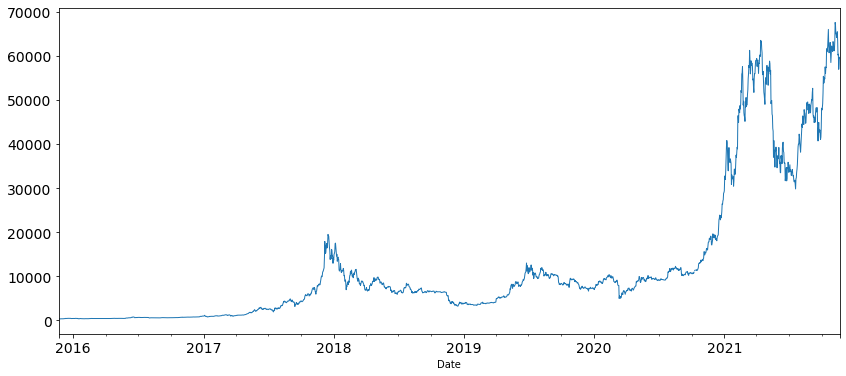

In [190]:
Adj_close_series.plot(figsize=(14,6), linewidth=1, fontsize=14);

In [192]:
Adj_close_series.index.freq = 'D'

In [193]:
resampled_AC = Adj_close_series.resample('Q').mean()

In [195]:
roll_mean = btc_df['Adj Close'].rolling(window=12, center=False).mean()
roll_std = btc_df['Adj Close'].rolling(window=12, center= False).std()

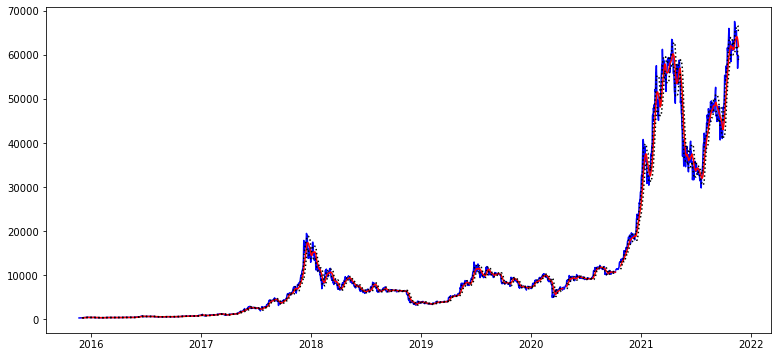

In [196]:
fig, ax = plt.subplots(figsize=(13,6))
ax.plot(btc_df['Adj Close'], color='blue', label='Closing Price')
ax.plot(roll_mean, color='red', label='Average')
ax.plot(roll_mean + roll_std, color='black', linestyle='dotted')
ax.plot(roll_mean - roll_std, color='black', linestyle='dotted')

In [207]:
btc_df_copy = btc_df.copy()

In [208]:
btc_df_log = np.log(btc_df)

<ipython-input-208-dd93e1ae97c7>:1: RuntimeWarning: divide by zero encountered in log
  btc_df_log = np.log(btc_df)
<ipython-input-208-dd93e1ae97c7>:1: RuntimeWarning: invalid value encountered in log
  btc_df_log = np.log(btc_df)


In [209]:
btc_df_log

,Open,High,Low,Close,Adj Close,Volume,sma_5d,sma_10d,sma_30d,sma_90d,...,RSI,ADX,21rollingV,MFM,MFV,CMF,StochRSI,StochRSIk,StochRSId,Percent Change
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-21,5.774837,5.793498,5.767055,5.789737,5.789737,17.154850,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-0.339277,16.815573,NaN,NaN,NaN,NaN,NaN
2015-11-22,5.789884,5.789991,5.772248,5.782397,5.782397,16.969929,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,-1.968764,15.001165,NaN,NaN,NaN,NaN,NaN
2015-11-23,5.781823,5.784188,5.772344,5.777795,5.777795,17.128929,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-24,5.777696,5.777832,5.762422,5.768465,5.768465,17.195232,NaN,NaN,NaN,NaN,...,NaN,4.605170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-11-25,5.768462,5.796465,5.758176,5.793641,5.793641,17.545218,5.782446,NaN,NaN,NaN,...,NaN,4.560505,NaN,-0.162654,17.382564,NaN,NaN,NaN,NaN,-3.669220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-17,11.004424,11.015733,10.977045,11.008215,11.008215,24.391391,11.047785,11.070791,11.045969,10.891064,...,3.814929,3.250164,24.298731,-0.502138,23.889253,-1.905413,-3.652751,-4.751363,-2.091451,-5.673198
2021-11-18,11.008084,11.017785,10.942895,10.949791,10.949791,24.446265,11.023522,11.054121,11.042069,10.892636,...,3.636504,3.233068,24.293558,NaN,NaN,-2.409341,-inf,-4.751363,-2.945137,NaN
2021-11-19,10.948983,10.974234,10.927828,10.970258,10.970258,24.379168,10.999259,11.040016,11.037858,10.894538,...,3.725630,3.226228,24.296029,-0.192387,24.186781,-2.210830,-2.142048,-3.041191,-3.831092,-3.878692


In [210]:
#btc_df_log = btc_df_log.fillna(0)

In [211]:
btc_df['Percent Change'] = btc_df['Adj Close'].pct_change()

<AxesSubplot:xlabel='Date'>

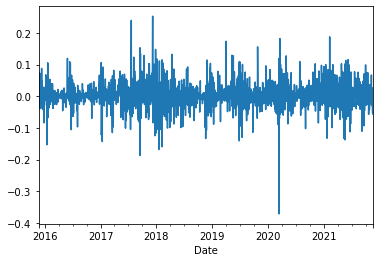

In [214]:
btc_df['Percent Change'].plot()

In [218]:
btc_clean = btc_df.fillna(0)

In [219]:
from statsmodels.tsa.stattools import adfuller

In [220]:
#adfuller test performed. Found the data to be stationary due to p-value(0.0)<0.05 and 
#critical value (-48.18) < 1%, 5%, and 10%.

adfuller(btc_clean['Percent Change'])

(-48.178923914894256,
 0.0,
 0,
 2192,
 {'1%': -3.433336758384354,
  '5%': -2.862859452510295,
  '10%': -2.567472409433441},
 -7831.138051277279)

In [228]:
from pmdarima import decompose
from pmdarima.utils import decomposed_plot

In [231]:
#Not sure if this is additive or multiplicative.???

decomposed_btc = decompose(btc_clean['Percent Change'].values, 'additive', m=12)

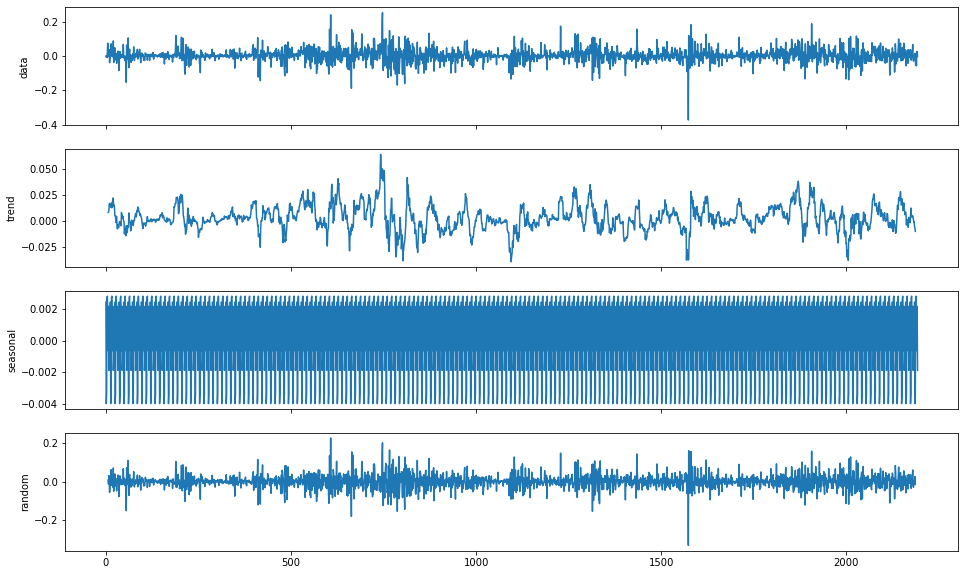

In [232]:
decomposed_plot(decomposed_btc, figure_kwargs={'figsize':(16,10)})
plt.show()

In [233]:
import statsmodels.graphics.tsaplots as tsa

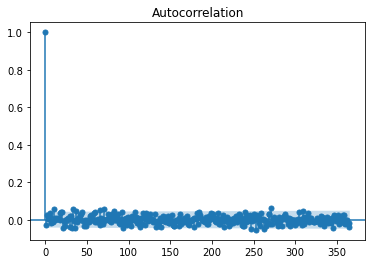

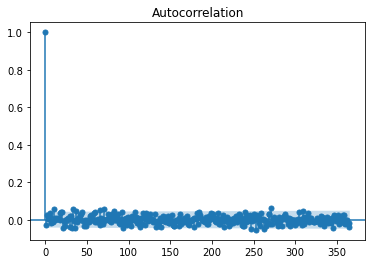

In [236]:
tsa.plot_acf(btc_clean['Percent Change'], lags=365)

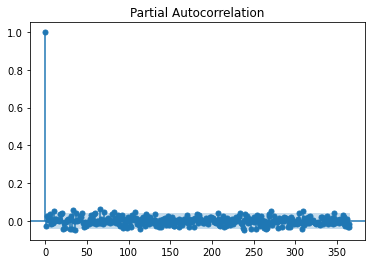

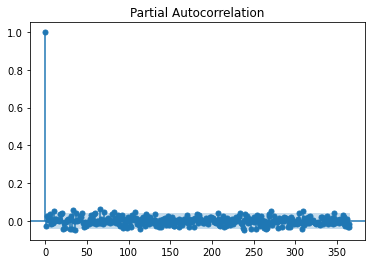

In [238]:
tsa.plot_pacf(btc_clean['Percent Change'], method='ywm', lags=365)

In [241]:
from sklearn import metrics

def report_metrics(y_true, y_pred):
    print('Explained Variance:\n\t', metrics.explained_variance_score(y_true, y_pred))
    print('Mean Absolute Error:\n\t', metrics.mean_absolute_error(y_true, y_pred))
    print('RMSE:\n\t', metrics.mean_squared_error(y_true, y_pred, squared=False))
    print('r^2:\n\t', metrics.r2_score(y_true, y_pred))

In [260]:
X_train = btc_clean.drop('Percent Change', axis=1).loc[btc_clean.index < '2021-10-21']
X_test = btc_clean.drop('Percent Change', axis=1).loc[btc_clean.index > '2021-10-21']
y_train = btc_clean['Percent Change'].loc[btc_clean.index < '2021-10-21']
y_test = btc_clean['Percent Change'].loc[btc_clean.index > '2021-10-21']

In [263]:
#most simple (naive) prediction for y is just the mean of the train set

y_pred_naive = [y_train.mean()] * len(y_test)


In [264]:
report_metrics(y_test, y_pred_naive)

Explained Variance:
	 0.0
Mean Absolute Error:
	 0.02219575706666472
RMSE:
	 0.027984168565113834
r^2:
	 -0.023911333629427878


In [275]:
from statsmodels.tsa.arima_model import ARIMA, ARIMA_DEPRECATION_WARN

In [277]:
#This does not work for some reason, has to do with 'ARIMA_DEPRECATION_WARN'?
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)

<ipython-input-277-7c6cd13c5aed>:8: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [278]:
arima_order = (12, 2, 0)
arima_mod = ARIMA(y_train, order=arima_order)
first_arima = arima_mod.fit()
print(first_arima.summary())

/Users/Teigen/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:      D2.Percent Change   No. Observations:                 2159
Model:                ARIMA(12, 2, 0)   Log Likelihood                3617.803
Method:                       css-mle   S.D. of innovations              0.045
Date:                Wed, 24 Nov 2021   AIC                          -7207.606
Time:                        21:56:01   BIC                          -7128.123
Sample:                    11-23-2015   HQIC                         -7178.534
                         - 10-20-2021                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     2.627e-07   4.78e-05      0.005      0.996   -9.35e-05     9.4e-05
ar.L1.D2.Percent Change     -1.7527      0.021    -82.328      0.000      -1.794      -1.

In [268]:
#What do each of these three arrays signify??

first_arima.forecast(len(y_test))

(array([0.03457254, 0.02455412, 0.02924182, 0.03083406, 0.03521706,
        0.0376156 , 0.03434003, 0.03692865, 0.03683843, 0.04680825,
        0.0455734 , 0.04596827, 0.04502712, 0.04817599, 0.04985609,
        0.0530012 , 0.05370126, 0.05527555, 0.05659398, 0.05906345,
        0.06109965, 0.06244906, 0.0636949 , 0.06476532, 0.06696717,
        0.06899982, 0.07082352, 0.07225132, 0.0738474 , 0.07546135,
        0.07731996]),
 array([0.04524105, 0.04660438, 0.04910716, 0.05198538, 0.05575904,
        0.06012857, 0.06562667, 0.07107627, 0.07728595, 0.0839763 ,
        0.09222345, 0.09998422, 0.10764862, 0.11510248, 0.12202685,
        0.13070444, 0.13953021, 0.14855406, 0.15773379, 0.16710842,
        0.17669225, 0.1865179 , 0.19643286, 0.2064707 , 0.21660021,
        0.22709484, 0.23784939, 0.24882819, 0.25997242, 0.271154  ,
        0.28251868]),
 array([[-0.0540983 ,  0.12324338],
        [-0.06678879,  0.11589703],
        [-0.06700643,  0.12549008],
        [-0.07105541,  0.1327235

In [282]:
#No seasonal order included in my arima?

seas_arima = ARIMA(y_train, seasonal_order = (1, 0, 0, 1), order=arima_order)

TypeError: __new__() got an unexpected keyword argument 'seasonal_order'